In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from IPython.core.display import display, HTML
from cross_validation import *
from build_polynomial import *
%load_ext autoreload
%autoreload 2
from proj1_helpers import *
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))


## Load the training data into feature matrix, class labels, and event ids:

In [3]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
#y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
#print(y.shape, tX.shape, ids.shape)

In [3]:
import pandas as pd
df = pd.read_csv("../data/train.csv")
df.tail()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
249995,349995,b,-999.000,71.989,36.548,5.042,-999.0,-999.0,-999.0,1.392,...,2.859,144.665,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000
249996,349996,b,-999.000,58.179,68.083,22.439,-999.0,-999.0,-999.0,2.585,...,-0.867,80.408,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000
249997,349997,s,105.457,60.526,75.839,39.757,-999.0,-999.0,-999.0,2.390,...,-2.890,198.907,1,41.992,1.8,-0.166,-999.0,-999.0,-999.0,41.992
249998,349998,b,94.951,19.362,68.812,13.504,-999.0,-999.0,-999.0,3.365,...,0.811,112.718,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000
249999,349999,b,-999.000,72.756,70.831,7.479,-999.0,-999.0,-999.0,2.025,...,-1.596,99.405,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000


In [4]:
y0, tX0, id0 = load_data_jet_number(DATA_TRAIN_PATH, 0, sub_sample=True)
y1, tX1, id1 = load_data_jet_number(DATA_TRAIN_PATH, 1, sub_sample=True)
y2, tX2, id2 = load_data_jet_number(DATA_TRAIN_PATH, 2, sub_sample=True)
y3, tX3, id3 = load_data_jet_number(DATA_TRAIN_PATH, 3, sub_sample=True)
tX0_standardized, tX0_mean, tX0_std= standardize(tX0)
tX1_standardized, tX1_mean, tX1_std= standardize(tX1)
tX2_standardized, tX2_mean, tX2_std= standardize(tX2)
tX3_standardized, tX3_mean, tX3_std= standardize(tX3)

In [5]:
print(y0.shape, tX0.shape, id0.shape)

(1999,) (1999, 18) (1999,)


In [17]:
print(np.std(tX0_standardized))

0.9986139979479094


## Do your thing crazy machine learning thing here :) ...

In [6]:
tX0_standardized = np.c_[np.ones((y0.shape[0], 1)), tX0_standardized] #VERY IMPORTANT
y0=y0.reshape(-1,1)
y0=(y0+1)/2
tX1_standardized = np.c_[np.ones((y1.shape[0], 1)), tX1_standardized] #VERY IMPORTANT
y1=y1.reshape(-1,1)
y1=(y1+1)/2
tX2_standardized = np.c_[np.ones((y2.shape[0], 1)), tX2_standardized] #VERY IMPORTANT
y2=y2.reshape(-1,1)
y2=(y2+1)/2
tX3_standardized = np.c_[np.ones((y3.shape[0], 1)), tX3_standardized] #VERY IMPORTANT
y3=y3.reshape(-1,1)
y3=(y3+1)/2

In [12]:
print(tX0_standardized.shape)
print(np.mean(tX0_standardized))

(1999, 19)
0.05263157894736842


In [22]:
[w,loss]=reg_logistic_regression(y0, tX0_standardized, 0.001,np.ones((tX0_standardized.shape[1], 1)), 10000, 0.0001)

Current iteration = 0, loss = [[1.78286643]] Current iteration = 0, loss = [[1.78287137]] Current iteration = 0, loss = [[1.7828732]] Current iteration = 0, loss = [[1.78287489]] Current iteration = 0, loss = [[1.78289204]] Current iteration = 0, loss = [[1.78289279]] Current iteration = 0, loss = [[1.78289578]] Current iteration = 0, loss = [[1.78289684]] Current iteration = 0, loss = [[1.78290256]] Current iteration = 0, loss = [[1.78290308]] Current iteration = 0, loss = [[1.78272105]] Current iteration = 0, loss = [[1.78258715]] Current iteration = 0, loss = [[1.78242653]] Current iteration = 0, loss = [[1.78232469]] Current iteration = 0, loss = [[1.78221843]] Current iteration = 0, loss = [[1.78208603]] Current iteration = 0, loss = [[1.78208982]] Current iteration = 0, loss = [[1.78209731]] Current iteration = 0, loss = [[1.78210145]] Current iteration = 0, loss = [[1.78197095]] Current iteration = 0, loss = [[1.78197137]] Current iteration = 0, loss = [[1.78184933]] Current ite

Current iteration = 0, loss = [[1.7655202]] Current iteration = 0, loss = [[1.76552769]] Current iteration = 0, loss = [[1.76553915]] Current iteration = 0, loss = [[1.76540589]] Current iteration = 0, loss = [[1.76542059]] Current iteration = 0, loss = [[1.76526498]] Current iteration = 0, loss = [[1.76526848]] Current iteration = 0, loss = [[1.76519222]] Current iteration = 0, loss = [[1.76509067]] Current iteration = 0, loss = [[1.76509304]] Current iteration = 0, loss = [[1.7649685]] Current iteration = 0, loss = [[1.7648361]] Current iteration = 0, loss = [[1.76467146]] Current iteration = 0, loss = [[1.76467698]] Current iteration = 0, loss = [[1.76468223]] Current iteration = 0, loss = [[1.76468336]] Current iteration = 0, loss = [[1.76456435]] Current iteration = 0, loss = [[1.7644125]] Current iteration = 0, loss = [[1.76423041]] Current iteration = 0, loss = [[1.76424461]] Current iteration = 0, loss = [[1.76424526]] Current iteration = 0, loss = [[1.76425181]] Current iterat

Current iteration = 0, loss = [[1.74174065]] Current iteration = 0, loss = [[1.74159231]] Current iteration = 0, loss = [[1.74148659]] Current iteration = 0, loss = [[1.74139115]] Current iteration = 0, loss = [[1.74126543]] Current iteration = 0, loss = [[1.7411772]] Current iteration = 0, loss = [[1.74118367]] Current iteration = 0, loss = [[1.74118556]] Current iteration = 0, loss = [[1.74119254]] Current iteration = 0, loss = [[1.74119387]] Current iteration = 0, loss = [[1.74119718]] Current iteration = 0, loss = [[1.74120631]] Current iteration = 0, loss = [[1.74120663]] Current iteration = 0, loss = [[1.74106804]] Current iteration = 0, loss = [[1.74097167]] Current iteration = 0, loss = [[1.74097254]] Current iteration = 0, loss = [[1.74074813]] Current iteration = 0, loss = [[1.74049315]] Current iteration = 0, loss = [[1.74049394]] Current iteration = 0, loss = [[1.74049585]] Current iteration = 0, loss = [[1.74049773]] Current iteration = 0, loss = [[1.74037449]] Current ite

Current iteration = 0, loss = [[1.72415738]] Current iteration = 0, loss = [[1.72402025]] Current iteration = 0, loss = [[1.72391486]] Current iteration = 0, loss = [[1.72391699]] Current iteration = 0, loss = [[1.72380894]] Current iteration = 0, loss = [[1.72368904]] Current iteration = 0, loss = [[1.72370119]] Current iteration = 0, loss = [[1.72370184]] Current iteration = 0, loss = [[1.72357811]] Current iteration = 0, loss = [[1.72359109]] Current iteration = 0, loss = [[1.7235962]] Current iteration = 0, loss = [[1.72360548]] Current iteration = 0, loss = [[1.72361755]] Current iteration = 0, loss = [[1.72344597]] Current iteration = 0, loss = [[1.72346119]] Current iteration = 0, loss = [[1.72329565]] Current iteration = 0, loss = [[1.72329978]] Current iteration = 0, loss = [[1.72330694]] Current iteration = 0, loss = [[1.72319984]] Current iteration = 0, loss = [[1.72305705]] Current iteration = 0, loss = [[1.72294452]] Current iteration = 0, loss = [[1.7228154]] Current iter

Current iteration = 0, loss = [[1.70805813]] Current iteration = 0, loss = [[1.70795386]] Current iteration = 0, loss = [[1.70776587]] Current iteration = 0, loss = [[1.70766958]] Current iteration = 0, loss = [[1.70739271]] Current iteration = 0, loss = [[1.70739539]] Current iteration = 0, loss = [[1.70739786]] Current iteration = 0, loss = [[1.70739851]] Current iteration = 0, loss = [[1.7072631]] Current iteration = 0, loss = [[1.70726448]] Current iteration = 0, loss = [[1.7071178]] Current iteration = 0, loss = [[1.7071212]] Current iteration = 0, loss = [[1.70700927]] Current iteration = 0, loss = [[1.70689837]] Current iteration = 0, loss = [[1.70689978]] Current iteration = 0, loss = [[1.70670115]] Current iteration = 0, loss = [[1.70670189]] Current iteration = 0, loss = [[1.70656202]] Current iteration = 0, loss = [[1.70656315]] Current iteration = 0, loss = [[1.70656608]] Current iteration = 0, loss = [[1.70656725]] Current iteration = 0, loss = [[1.70656802]] Current itera

Current iteration = 0, loss = [[1.68859782]] Current iteration = 0, loss = [[1.68849179]] Current iteration = 0, loss = [[1.68849368]] Current iteration = 0, loss = [[1.68833282]] Current iteration = 0, loss = [[1.68833948]] Current iteration = 0, loss = [[1.68834246]] Current iteration = 0, loss = [[1.68834509]] Current iteration = 0, loss = [[1.68834626]] Current iteration = 0, loss = [[1.68834969]] Current iteration = 0, loss = [[1.68820317]] Current iteration = 0, loss = [[1.68804917]] Current iteration = 0, loss = [[1.6879053]] Current iteration = 0, loss = [[1.68791285]] Current iteration = 0, loss = [[1.68791423]] Current iteration = 0, loss = [[1.68782367]] Current iteration = 0, loss = [[1.6876955]] Current iteration = 0, loss = [[1.68750548]] Current iteration = 0, loss = [[1.68750708]] Current iteration = 0, loss = [[1.68751676]] Current iteration = 0, loss = [[1.68751814]] Current iteration = 0, loss = [[1.68751862]] Current iteration = 0, loss = [[1.68730974]] Current iter

Current iteration = 0, loss = [[1.66605448]] Current iteration = 0, loss = [[1.66595812]] Current iteration = 0, loss = [[1.66585853]] Current iteration = 0, loss = [[1.66586011]] Current iteration = 0, loss = [[1.66588065]] Current iteration = 0, loss = [[1.66574106]] Current iteration = 0, loss = [[1.66560946]] Current iteration = 0, loss = [[1.66561089]] Current iteration = 0, loss = [[1.6654955]] Current iteration = 0, loss = [[1.66531674]] Current iteration = 0, loss = [[1.66519505]] Current iteration = 0, loss = [[1.66521228]] Current iteration = 0, loss = [[1.66522258]] Current iteration = 0, loss = [[1.665118]] Current iteration = 0, loss = [[1.66512295]] Current iteration = 0, loss = [[1.66502383]] Current iteration = 0, loss = [[1.66480508]] Current iteration = 0, loss = [[1.66465499]] Current iteration = 0, loss = [[1.66454951]] Current iteration = 0, loss = [[1.66455093]] Current iteration = 0, loss = [[1.6645543]] Current iteration = 0, loss = [[1.66455679]] Current iterat

Current iteration = 0, loss = [[1.64488201]] Current iteration = 0, loss = [[1.64477249]] Current iteration = 0, loss = [[1.64477859]] Current iteration = 0, loss = [[1.64478933]] Current iteration = 0, loss = [[1.64462714]] Current iteration = 0, loss = [[1.64462865]] Current iteration = 0, loss = [[1.6446346]] Current iteration = 0, loss = [[1.6446502]] Current iteration = 0, loss = [[1.64465309]] Current iteration = 0, loss = [[1.64466119]] Current iteration = 0, loss = [[1.64454544]] Current iteration = 0, loss = [[1.64454732]] Current iteration = 0, loss = [[1.64438509]] Current iteration = 0, loss = [[1.64419646]] Current iteration = 0, loss = [[1.6441971]] Current iteration = 0, loss = [[1.64399002]] Current iteration = 0, loss = [[1.6440046]] Current iteration = 0, loss = [[1.64401818]] Current iteration = 0, loss = [[1.64401912]] Current iteration = 0, loss = [[1.64386774]] Current iteration = 0, loss = [[1.64378507]] Current iteration = 0, loss = [[1.64364055]] Current iterat

Current iteration = 0, loss = [[1.64345581]] Current iteration = 0, loss = [[1.64345566]] Current iteration = 0, loss = [[1.64345551]] Current iteration = 0, loss = [[1.64345537]] Current iteration = 0, loss = [[1.64345522]] Current iteration = 0, loss = [[1.64345508]] Current iteration = 0, loss = [[1.64345493]] Current iteration = 0, loss = [[1.64345479]] Current iteration = 0, loss = [[1.64345464]] Current iteration = 0, loss = [[1.64345449]] Current iteration = 0, loss = [[1.64345435]] Current iteration = 0, loss = [[1.6434542]] Current iteration = 0, loss = [[1.64345406]] Current iteration = 0, loss = [[1.64345391]] Current iteration = 0, loss = [[1.64345376]] Current iteration = 0, loss = [[1.64345362]] Current iteration = 0, loss = [[1.64345347]] Current iteration = 0, loss = [[1.64345333]] Current iteration = 0, loss = [[1.64345318]] Current iteration = 0, loss = [[1.64345304]] Current iteration = 0, loss = [[1.64345289]] Current iteration = 0, loss = [[1.64345274]] Current ite

Current iteration = 0, loss = [[1.64341308]] Current iteration = 0, loss = [[1.64341293]] Current iteration = 0, loss = [[1.64341279]] Current iteration = 0, loss = [[1.64341264]] Current iteration = 0, loss = [[1.6434125]] Current iteration = 0, loss = [[1.64341235]] Current iteration = 0, loss = [[1.64341221]] Current iteration = 0, loss = [[1.64341206]] Current iteration = 0, loss = [[1.64341191]] Current iteration = 0, loss = [[1.64341177]] Current iteration = 0, loss = [[1.64341162]] Current iteration = 0, loss = [[1.64341148]] Current iteration = 0, loss = [[1.64341133]] Current iteration = 0, loss = [[1.64341118]] Current iteration = 0, loss = [[1.64341104]] Current iteration = 0, loss = [[1.64341089]] Current iteration = 0, loss = [[1.64341075]] Current iteration = 0, loss = [[1.6434106]] Current iteration = 0, loss = [[1.64341046]] Current iteration = 0, loss = [[1.64341031]] Current iteration = 0, loss = [[1.64341016]] Current iteration = 0, loss = [[1.64341002]] Current iter

Current iteration = 0, loss = [[1.64336802]] Current iteration = 0, loss = [[1.64336788]] Current iteration = 0, loss = [[1.64336773]] Current iteration = 0, loss = [[1.64336759]] Current iteration = 0, loss = [[1.64336744]] Current iteration = 0, loss = [[1.64336729]] Current iteration = 0, loss = [[1.64336715]] Current iteration = 0, loss = [[1.643367]] Current iteration = 0, loss = [[1.64336686]] Current iteration = 0, loss = [[1.64336671]] Current iteration = 0, loss = [[1.64336656]] Current iteration = 0, loss = [[1.64336642]] Current iteration = 0, loss = [[1.64336627]] Current iteration = 0, loss = [[1.64336613]] Current iteration = 0, loss = [[1.64336598]] Current iteration = 0, loss = [[1.64336584]] Current iteration = 0, loss = [[1.64336569]] Current iteration = 0, loss = [[1.64336554]] Current iteration = 0, loss = [[1.6433654]] Current iteration = 0, loss = [[1.64336525]] Current iteration = 0, loss = [[1.64336511]] Current iteration = 0, loss = [[1.64336496]] Current itera

Current iteration = 0, loss = [[1.64332107]] Current iteration = 0, loss = [[1.64332093]] Current iteration = 0, loss = [[1.64332078]] Current iteration = 0, loss = [[1.64332063]] Current iteration = 0, loss = [[1.64332049]] Current iteration = 0, loss = [[1.64332034]] Current iteration = 0, loss = [[1.6433202]] Current iteration = 0, loss = [[1.64332005]] Current iteration = 0, loss = [[1.64331991]] Current iteration = 0, loss = [[1.64331976]] Current iteration = 0, loss = [[1.64331961]] Current iteration = 0, loss = [[1.64331947]] Current iteration = 0, loss = [[1.64331932]] Current iteration = 0, loss = [[1.64331918]] Current iteration = 0, loss = [[1.64331903]] Current iteration = 0, loss = [[1.64331888]] Current iteration = 0, loss = [[1.64331874]] Current iteration = 0, loss = [[1.64331859]] Current iteration = 0, loss = [[1.64331845]] Current iteration = 0, loss = [[1.6433183]] Current iteration = 0, loss = [[1.64331816]] Current iteration = 0, loss = [[1.64331801]] Current iter

Current iteration = 0, loss = [[1.64327398]] Current iteration = 0, loss = [[1.64327383]] Current iteration = 0, loss = [[1.64327369]] Current iteration = 0, loss = [[1.64327354]] Current iteration = 0, loss = [[1.64327339]] Current iteration = 0, loss = [[1.64327325]] Current iteration = 0, loss = [[1.6432731]] Current iteration = 0, loss = [[1.64327296]] Current iteration = 0, loss = [[1.64327281]] Current iteration = 0, loss = [[1.64327266]] Current iteration = 0, loss = [[1.64327252]] Current iteration = 0, loss = [[1.64327237]] Current iteration = 0, loss = [[1.64327223]] Current iteration = 0, loss = [[1.64327208]] Current iteration = 0, loss = [[1.64327194]] Current iteration = 0, loss = [[1.64327179]] Current iteration = 0, loss = [[1.64327164]] Current iteration = 0, loss = [[1.6432715]] Current iteration = 0, loss = [[1.64327135]] Current iteration = 0, loss = [[1.64327121]] Current iteration = 0, loss = [[1.64327106]] Current iteration = 0, loss = [[1.64327091]] Current iter

Current iteration = 0, loss = [[1.64322717]] Current iteration = 0, loss = [[1.64322703]] Current iteration = 0, loss = [[1.64322688]] Current iteration = 0, loss = [[1.64322674]] Current iteration = 0, loss = [[1.64322659]] Current iteration = 0, loss = [[1.64322645]] Current iteration = 0, loss = [[1.6432263]] Current iteration = 0, loss = [[1.64322615]] Current iteration = 0, loss = [[1.64322601]] Current iteration = 0, loss = [[1.64322586]] Current iteration = 0, loss = [[1.64322572]] Current iteration = 0, loss = [[1.64322557]] Current iteration = 0, loss = [[1.64322543]] Current iteration = 0, loss = [[1.64322528]] Current iteration = 0, loss = [[1.64322513]] Current iteration = 0, loss = [[1.64322499]] Current iteration = 0, loss = [[1.64322484]] Current iteration = 0, loss = [[1.6432247]] Current iteration = 0, loss = [[1.64322455]] Current iteration = 0, loss = [[1.6432244]] Current iteration = 0, loss = [[1.64322426]] Current iteration = 0, loss = [[1.64322411]] Current itera

Current iteration = 0, loss = [[1.64318038]] Current iteration = 0, loss = [[1.64318023]] Current iteration = 0, loss = [[1.64318008]] Current iteration = 0, loss = [[1.64317994]] Current iteration = 0, loss = [[1.64317979]] Current iteration = 0, loss = [[1.64317965]] Current iteration = 0, loss = [[1.6431795]] Current iteration = 0, loss = [[1.64317935]] Current iteration = 0, loss = [[1.64317921]] Current iteration = 0, loss = [[1.64317906]] Current iteration = 0, loss = [[1.64317892]] Current iteration = 0, loss = [[1.64317877]] Current iteration = 0, loss = [[1.64317863]] Current iteration = 0, loss = [[1.64317848]] Current iteration = 0, loss = [[1.64317833]] Current iteration = 0, loss = [[1.64317819]] Current iteration = 0, loss = [[1.64317804]] Current iteration = 0, loss = [[1.6431779]] Current iteration = 0, loss = [[1.64317775]] Current iteration = 0, loss = [[1.64317761]] Current iteration = 0, loss = [[1.64317746]] Current iteration = 0, loss = [[1.64317731]] Current iter

Current iteration = 0, loss = [[1.64313489]] Current iteration = 0, loss = [[1.64313474]] Current iteration = 0, loss = [[1.6431346]] Current iteration = 0, loss = [[1.64313445]] Current iteration = 0, loss = [[1.64313431]] Current iteration = 0, loss = [[1.64313416]] Current iteration = 0, loss = [[1.64313401]] Current iteration = 0, loss = [[1.64313387]] Current iteration = 0, loss = [[1.64313372]] Current iteration = 0, loss = [[1.64313358]] Current iteration = 0, loss = [[1.64313343]] Current iteration = 0, loss = [[1.64313329]] Current iteration = 0, loss = [[1.64313314]] Current iteration = 0, loss = [[1.64313299]] Current iteration = 0, loss = [[1.64313285]] Current iteration = 0, loss = [[1.6431327]] Current iteration = 0, loss = [[1.64313256]] Current iteration = 0, loss = [[1.64313241]] Current iteration = 0, loss = [[1.64313227]] Current iteration = 0, loss = [[1.64313212]] Current iteration = 0, loss = [[1.64313197]] Current iteration = 0, loss = [[1.64313183]] Current iter

Current iteration = 0, loss = [[1.64308853]] Current iteration = 0, loss = [[1.64308838]] Current iteration = 0, loss = [[1.64308824]] Current iteration = 0, loss = [[1.64308809]] Current iteration = 0, loss = [[1.64308795]] Current iteration = 0, loss = [[1.6430878]] Current iteration = 0, loss = [[1.64308766]] Current iteration = 0, loss = [[1.64308751]] Current iteration = 0, loss = [[1.64308736]] Current iteration = 0, loss = [[1.64308722]] Current iteration = 0, loss = [[1.64308707]] Current iteration = 0, loss = [[1.64308693]] Current iteration = 0, loss = [[1.64308678]] Current iteration = 0, loss = [[1.64308664]] Current iteration = 0, loss = [[1.64308649]] Current iteration = 0, loss = [[1.64308634]] Current iteration = 0, loss = [[1.6430862]] Current iteration = 0, loss = [[1.64308605]] Current iteration = 0, loss = [[1.64308591]] Current iteration = 0, loss = [[1.64308576]] Current iteration = 0, loss = [[1.64308561]] Current iteration = 0, loss = [[1.64308547]] Current iter

Current iteration = 0, loss = [[1.64304276]] Current iteration = 0, loss = [[1.64304261]] Current iteration = 0, loss = [[1.64304246]] Current iteration = 0, loss = [[1.64304232]] Current iteration = 0, loss = [[1.64304217]] Current iteration = 0, loss = [[1.64304203]] Current iteration = 0, loss = [[1.64304188]] Current iteration = 0, loss = [[1.64304174]] Current iteration = 0, loss = [[1.64304159]] Current iteration = 0, loss = [[1.64304144]] Current iteration = 0, loss = [[1.6430413]] Current iteration = 0, loss = [[1.64304115]] Current iteration = 0, loss = [[1.64304101]] Current iteration = 0, loss = [[1.64304086]] Current iteration = 0, loss = [[1.64304072]] Current iteration = 0, loss = [[1.64304057]] Current iteration = 0, loss = [[1.64304042]] Current iteration = 0, loss = [[1.64304028]] Current iteration = 0, loss = [[1.64304013]] Current iteration = 0, loss = [[1.64303999]] Current iteration = 0, loss = [[1.64303984]] Current iteration = 0, loss = [[1.6430397]] Current iter

Current iteration = 0, loss = [[1.64299582]] Current iteration = 0, loss = [[1.64299567]] Current iteration = 0, loss = [[1.64299553]] Current iteration = 0, loss = [[1.64299538]] Current iteration = 0, loss = [[1.64299523]] Current iteration = 0, loss = [[1.64299509]] Current iteration = 0, loss = [[1.64299494]] Current iteration = 0, loss = [[1.6429948]] Current iteration = 0, loss = [[1.64299465]] Current iteration = 0, loss = [[1.64299451]] Current iteration = 0, loss = [[1.64299436]] Current iteration = 0, loss = [[1.64299421]] Current iteration = 0, loss = [[1.64299407]] Current iteration = 0, loss = [[1.64299392]] Current iteration = 0, loss = [[1.64299378]] Current iteration = 0, loss = [[1.64299363]] Current iteration = 0, loss = [[1.64299349]] Current iteration = 0, loss = [[1.64299334]] Current iteration = 0, loss = [[1.64299319]] Current iteration = 0, loss = [[1.64299305]] Current iteration = 0, loss = [[1.6429929]] Current iteration = 0, loss = [[1.64299276]] Current iter

Current iteration = 0, loss = [[1.64294961]] Current iteration = 0, loss = [[1.64294946]] Current iteration = 0, loss = [[1.64294932]] Current iteration = 0, loss = [[1.64294917]] Current iteration = 0, loss = [[1.64294903]] Current iteration = 0, loss = [[1.64294888]] Current iteration = 0, loss = [[1.64294874]] Current iteration = 0, loss = [[1.64294859]] Current iteration = 0, loss = [[1.64294844]] Current iteration = 0, loss = [[1.6429483]] Current iteration = 0, loss = [[1.64294815]] Current iteration = 0, loss = [[1.64294801]] Current iteration = 0, loss = [[1.64294786]] Current iteration = 0, loss = [[1.64294772]] Current iteration = 0, loss = [[1.64294757]] Current iteration = 0, loss = [[1.64294742]] Current iteration = 0, loss = [[1.64294728]] Current iteration = 0, loss = [[1.64294713]] Current iteration = 0, loss = [[1.64294699]] Current iteration = 0, loss = [[1.64294684]] Current iteration = 0, loss = [[1.64294669]] Current iteration = 0, loss = [[1.64294655]] Current ite

Current iteration = 0, loss = [[1.64290413]] Current iteration = 0, loss = [[1.64290399]] Current iteration = 0, loss = [[1.64290384]] Current iteration = 0, loss = [[1.6429037]] Current iteration = 0, loss = [[1.64290355]] Current iteration = 0, loss = [[1.6429034]] Current iteration = 0, loss = [[1.64290326]] Current iteration = 0, loss = [[1.64290311]] Current iteration = 0, loss = [[1.64290297]] Current iteration = 0, loss = [[1.64290282]] Current iteration = 0, loss = [[1.64290268]] Current iteration = 0, loss = [[1.64290253]] Current iteration = 0, loss = [[1.64290238]] Current iteration = 0, loss = [[1.64290224]] Current iteration = 0, loss = [[1.64290209]] Current iteration = 0, loss = [[1.64290195]] Current iteration = 0, loss = [[1.6429018]] Current iteration = 0, loss = [[1.64290166]] Current iteration = 0, loss = [[1.64290151]] Current iteration = 0, loss = [[1.64290136]] Current iteration = 0, loss = [[1.64290122]] Current iteration = 0, loss = [[1.64290107]] Current itera

Current iteration = 0, loss = [[1.64285735]] Current iteration = 0, loss = [[1.6428572]] Current iteration = 0, loss = [[1.64285705]] Current iteration = 0, loss = [[1.64285691]] Current iteration = 0, loss = [[1.64285676]] Current iteration = 0, loss = [[1.64285662]] Current iteration = 0, loss = [[1.64285647]] Current iteration = 0, loss = [[1.64285633]] Current iteration = 0, loss = [[1.64285618]] Current iteration = 0, loss = [[1.64285603]] Current iteration = 0, loss = [[1.64285589]] Current iteration = 0, loss = [[1.64285574]] Current iteration = 0, loss = [[1.6428556]] Current iteration = 0, loss = [[1.64285545]] Current iteration = 0, loss = [[1.64285531]] Current iteration = 0, loss = [[1.64285516]] Current iteration = 0, loss = [[1.64285501]] Current iteration = 0, loss = [[1.64285487]] Current iteration = 0, loss = [[1.64285472]] Current iteration = 0, loss = [[1.64285458]] Current iteration = 0, loss = [[1.64285443]] Current iteration = 0, loss = [[1.64285429]] Current iter

Current iteration = 0, loss = [[1.64281056]] Current iteration = 0, loss = [[1.64281041]] Current iteration = 0, loss = [[1.64281027]] Current iteration = 0, loss = [[1.64281012]] Current iteration = 0, loss = [[1.64280998]] Current iteration = 0, loss = [[1.64280983]] Current iteration = 0, loss = [[1.64280969]] Current iteration = 0, loss = [[1.64280954]] Current iteration = 0, loss = [[1.64280939]] Current iteration = 0, loss = [[1.64280925]] Current iteration = 0, loss = [[1.6428091]] Current iteration = 0, loss = [[1.64280896]] Current iteration = 0, loss = [[1.64280881]] Current iteration = 0, loss = [[1.64280867]] Current iteration = 0, loss = [[1.64280852]] Current iteration = 0, loss = [[1.64280837]] Current iteration = 0, loss = [[1.64280823]] Current iteration = 0, loss = [[1.64280808]] Current iteration = 0, loss = [[1.64280794]] Current iteration = 0, loss = [[1.64280779]] Current iteration = 0, loss = [[1.64280765]] Current iteration = 0, loss = [[1.6428075]] Current iter

Current iteration = 0, loss = [[1.64276276]] Current iteration = 0, loss = [[1.64276261]] Current iteration = 0, loss = [[1.64276247]] Current iteration = 0, loss = [[1.64276232]] Current iteration = 0, loss = [[1.64276217]] Current iteration = 0, loss = [[1.64276203]] Current iteration = 0, loss = [[1.64276188]] Current iteration = 0, loss = [[1.64276174]] Current iteration = 0, loss = [[1.64276159]] Current iteration = 0, loss = [[1.64276145]] Current iteration = 0, loss = [[1.6427613]] Current iteration = 0, loss = [[1.64276115]] Current iteration = 0, loss = [[1.64276101]] Current iteration = 0, loss = [[1.64276086]] Current iteration = 0, loss = [[1.64276072]] Current iteration = 0, loss = [[1.64276057]] Current iteration = 0, loss = [[1.64276042]] Current iteration = 0, loss = [[1.64276028]] Current iteration = 0, loss = [[1.64276013]] Current iteration = 0, loss = [[1.64275999]] Current iteration = 0, loss = [[1.64275984]] Current iteration = 0, loss = [[1.6427597]] Current iter

Current iteration = 0, loss = [[1.64271641]] Current iteration = 0, loss = [[1.64271627]] Current iteration = 0, loss = [[1.64271612]] Current iteration = 0, loss = [[1.64271598]] Current iteration = 0, loss = [[1.64271583]] Current iteration = 0, loss = [[1.64271568]] Current iteration = 0, loss = [[1.64271554]] Current iteration = 0, loss = [[1.64271539]] Current iteration = 0, loss = [[1.64271525]] Current iteration = 0, loss = [[1.6427151]] Current iteration = 0, loss = [[1.64271496]] Current iteration = 0, loss = [[1.64271481]] Current iteration = 0, loss = [[1.64271466]] Current iteration = 0, loss = [[1.64271452]] Current iteration = 0, loss = [[1.64271437]] Current iteration = 0, loss = [[1.64271423]] Current iteration = 0, loss = [[1.64271408]] Current iteration = 0, loss = [[1.64271393]] Current iteration = 0, loss = [[1.64271379]] Current iteration = 0, loss = [[1.64271364]] Current iteration = 0, loss = [[1.6427135]] Current iteration = 0, loss = [[1.64271335]] Current iter

Current iteration = 0, loss = [[1.64267124]] Current iteration = 0, loss = [[1.64267109]] Current iteration = 0, loss = [[1.64267094]] Current iteration = 0, loss = [[1.6426708]] Current iteration = 0, loss = [[1.64267065]] Current iteration = 0, loss = [[1.64267051]] Current iteration = 0, loss = [[1.64267036]] Current iteration = 0, loss = [[1.64267022]] Current iteration = 0, loss = [[1.64267007]] Current iteration = 0, loss = [[1.64266992]] Current iteration = 0, loss = [[1.64266978]] Current iteration = 0, loss = [[1.64266963]] Current iteration = 0, loss = [[1.64266949]] Current iteration = 0, loss = [[1.64266934]] Current iteration = 0, loss = [[1.6426692]] Current iteration = 0, loss = [[1.64266905]] Current iteration = 0, loss = [[1.6426689]] Current iteration = 0, loss = [[1.64266876]] Current iteration = 0, loss = [[1.64266861]] Current iteration = 0, loss = [[1.64266847]] Current iteration = 0, loss = [[1.64266832]] Current iteration = 0, loss = [[1.64266818]] Current itera

Current iteration = 0, loss = [[1.64262577]] Current iteration = 0, loss = [[1.64262562]] Current iteration = 0, loss = [[1.64262548]] Current iteration = 0, loss = [[1.64262533]] Current iteration = 0, loss = [[1.64262519]] Current iteration = 0, loss = [[1.64262504]] Current iteration = 0, loss = [[1.64262489]] Current iteration = 0, loss = [[1.64262475]] Current iteration = 0, loss = [[1.6426246]] Current iteration = 0, loss = [[1.64262446]] Current iteration = 0, loss = [[1.64262431]] Current iteration = 0, loss = [[1.64262417]] Current iteration = 0, loss = [[1.64262402]] Current iteration = 0, loss = [[1.64262387]] Current iteration = 0, loss = [[1.64262373]] Current iteration = 0, loss = [[1.64262358]] Current iteration = 0, loss = [[1.64262344]] Current iteration = 0, loss = [[1.64262329]] Current iteration = 0, loss = [[1.64262315]] Current iteration = 0, loss = [[1.642623]] Current iteration = 0, loss = [[1.64262285]] Current iteration = 0, loss = [[1.64262271]] Current itera

Current iteration = 0, loss = [[1.64258045]] Current iteration = 0, loss = [[1.6425803]] Current iteration = 0, loss = [[1.64258016]] Current iteration = 0, loss = [[1.64258001]] Current iteration = 0, loss = [[1.64257987]] Current iteration = 0, loss = [[1.64257972]] Current iteration = 0, loss = [[1.64257958]] Current iteration = 0, loss = [[1.64257943]] Current iteration = 0, loss = [[1.64257928]] Current iteration = 0, loss = [[1.64257914]] Current iteration = 0, loss = [[1.64257899]] Current iteration = 0, loss = [[1.64257885]] Current iteration = 0, loss = [[1.6425787]] Current iteration = 0, loss = [[1.64257856]] Current iteration = 0, loss = [[1.64257841]] Current iteration = 0, loss = [[1.64257826]] Current iteration = 0, loss = [[1.64257812]] Current iteration = 0, loss = [[1.64257797]] Current iteration = 0, loss = [[1.64257783]] Current iteration = 0, loss = [[1.64257768]] Current iteration = 0, loss = [[1.64257754]] Current iteration = 0, loss = [[1.64257739]] Current iter

Current iteration = 0, loss = [[1.64253353]] Current iteration = 0, loss = [[1.64253338]] Current iteration = 0, loss = [[1.64253324]] Current iteration = 0, loss = [[1.64253309]] Current iteration = 0, loss = [[1.64253295]] Current iteration = 0, loss = [[1.6425328]] Current iteration = 0, loss = [[1.64253266]] Current iteration = 0, loss = [[1.64253251]] Current iteration = 0, loss = [[1.64253236]] Current iteration = 0, loss = [[1.64253222]] Current iteration = 0, loss = [[1.64253207]] Current iteration = 0, loss = [[1.64253193]] Current iteration = 0, loss = [[1.64253178]] Current iteration = 0, loss = [[1.64253164]] Current iteration = 0, loss = [[1.64253149]] Current iteration = 0, loss = [[1.64253134]] Current iteration = 0, loss = [[1.6425312]] Current iteration = 0, loss = [[1.64253105]] Current iteration = 0, loss = [[1.64253091]] Current iteration = 0, loss = [[1.64253076]] Current iteration = 0, loss = [[1.64253062]] Current iteration = 0, loss = [[1.64253047]] Current iter

Current iteration = 0, loss = [[1.64248661]] Current iteration = 0, loss = [[1.64248647]] Current iteration = 0, loss = [[1.64248632]] Current iteration = 0, loss = [[1.64248617]] Current iteration = 0, loss = [[1.64248603]] Current iteration = 0, loss = [[1.64248588]] Current iteration = 0, loss = [[1.64248574]] Current iteration = 0, loss = [[1.64248559]] Current iteration = 0, loss = [[1.64248545]] Current iteration = 0, loss = [[1.6424853]] Current iteration = 0, loss = [[1.64248515]] Current iteration = 0, loss = [[1.64248501]] Current iteration = 0, loss = [[1.64248486]] Current iteration = 0, loss = [[1.64248472]] Current iteration = 0, loss = [[1.64248457]] Current iteration = 0, loss = [[1.64248443]] Current iteration = 0, loss = [[1.64248428]] Current iteration = 0, loss = [[1.64248413]] Current iteration = 0, loss = [[1.64248399]] Current iteration = 0, loss = [[1.64248384]] Current iteration = 0, loss = [[1.6424837]] Current iteration = 0, loss = [[1.64248355]] Current iter

Current iteration = 0, loss = [[1.64244028]] Current iteration = 0, loss = [[1.64244013]] Current iteration = 0, loss = [[1.64243999]] Current iteration = 0, loss = [[1.64243984]] Current iteration = 0, loss = [[1.64243969]] Current iteration = 0, loss = [[1.64243955]] Current iteration = 0, loss = [[1.6424394]] Current iteration = 0, loss = [[1.64243926]] Current iteration = 0, loss = [[1.64243911]] Current iteration = 0, loss = [[1.64243897]] Current iteration = 0, loss = [[1.64243882]] Current iteration = 0, loss = [[1.64243868]] Current iteration = 0, loss = [[1.64243853]] Current iteration = 0, loss = [[1.64243838]] Current iteration = 0, loss = [[1.64243824]] Current iteration = 0, loss = [[1.64243809]] Current iteration = 0, loss = [[1.64243795]] Current iteration = 0, loss = [[1.6424378]] Current iteration = 0, loss = [[1.64243766]] Current iteration = 0, loss = [[1.64243751]] Current iteration = 0, loss = [[1.64243736]] Current iteration = 0, loss = [[1.64243722]] Current iter

Current iteration = 0, loss = [[1.64239569]] Current iteration = 0, loss = [[1.64239555]] Current iteration = 0, loss = [[1.6423954]] Current iteration = 0, loss = [[1.64239526]] Current iteration = 0, loss = [[1.64239511]] Current iteration = 0, loss = [[1.64239497]] Current iteration = 0, loss = [[1.64239482]] Current iteration = 0, loss = [[1.64239467]] Current iteration = 0, loss = [[1.64239453]] Current iteration = 0, loss = [[1.64239438]] Current iteration = 0, loss = [[1.64239424]] Current iteration = 0, loss = [[1.64239409]] Current iteration = 0, loss = [[1.64239395]] Current iteration = 0, loss = [[1.6423938]] Current iteration = 0, loss = [[1.64239365]] Current iteration = 0, loss = [[1.64239351]] Current iteration = 0, loss = [[1.64239336]] Current iteration = 0, loss = [[1.64239322]] Current iteration = 0, loss = [[1.64239307]] Current iteration = 0, loss = [[1.64239293]] Current iteration = 0, loss = [[1.64239278]] Current iteration = 0, loss = [[1.64239263]] Current iter

Current iteration = 0, loss = [[1.64234878]] Current iteration = 0, loss = [[1.64234864]] Current iteration = 0, loss = [[1.64234849]] Current iteration = 0, loss = [[1.64234834]] Current iteration = 0, loss = [[1.6423482]] Current iteration = 0, loss = [[1.64234805]] Current iteration = 0, loss = [[1.64234791]] Current iteration = 0, loss = [[1.64234776]] Current iteration = 0, loss = [[1.64234762]] Current iteration = 0, loss = [[1.64234747]] Current iteration = 0, loss = [[1.64234732]] Current iteration = 0, loss = [[1.64234718]] Current iteration = 0, loss = [[1.64234703]] Current iteration = 0, loss = [[1.64234689]] Current iteration = 0, loss = [[1.64234674]] Current iteration = 0, loss = [[1.6423466]] Current iteration = 0, loss = [[1.64234645]] Current iteration = 0, loss = [[1.6423463]] Current iteration = 0, loss = [[1.64234616]] Current iteration = 0, loss = [[1.64234601]] Current iteration = 0, loss = [[1.64234587]] Current iteration = 0, loss = [[1.64234572]] Current itera

Current iteration = 2000, loss = [[0.5522845]] rate = [[-4.51229842e-07]]
Current iteration = 2000, loss = [[0.55228404]] rate = [[-9.4471948e-07]]
Current iteration = 2000, loss = [[0.55228615]] rate = [[4.61949e-07]]
Current iteration = 2000, loss = [[0.55228507]] rate = [[-2.10330601e-06]]
Current iteration = 2000, loss = [[0.55228549]] rate = [[1.07916232e-06]]
Current iteration = 2000, loss = [[0.55228387]] rate = [[-4.21423448e-07]]
Current iteration = 2000, loss = [[0.55228264]] rate = [[1.61810222e-06]]
Current iteration = 2000, loss = [[0.55228376]] rate = [[1.22481367e-06]]
Current iteration = 2000, loss = [[0.5522828]] rate = [[-1.11480582e-06]]
Current iteration = 2000, loss = [[0.55228228]] rate = [[9.60270895e-07]]
Current iteration = 2000, loss = [[0.55228289]] rate = [[5.16930971e-07]]
Current iteration = 2000, loss = [[0.55228254]] rate = [[-6.05771312e-07]]
Current iteration = 2000, loss = [[0.55228234]] rate = [[3.45166889e-07]]
Current iteration = 2000, loss = [[0.5

DEGREE = 1
Lambda = 1e-08
K-Fold =  0
Current iteration = 0, loss = [[3.18843101]] Current iteration = 0, loss = [[3.13169388]] Current iteration = 0, loss = [[3.06310833]] Current iteration = 0, loss = [[3.01563406]] Current iteration = 2000, loss = [[0.56534083]] rate = [[-0.00021739]]
Current iteration = 2000, loss = [[0.56591219]] rate = [[0.00191321]]
Current iteration = 2000, loss = [[0.56540905]] rate = [[-0.00057136]]
Current iteration = 2000, loss = [[0.56592141]] rate = [[0.00050314]]
Current iteration = 4000, loss = [[0.56568412]] rate = [[0.00022378]]
Current iteration = 4000, loss = [[0.56657589]] rate = [[-0.00022155]]
Current iteration = 4000, loss = [[0.56592892]] rate = [[-0.00089176]]
Current iteration = 4000, loss = [[0.56668542]] rate = [[0.00064697]]
Current iteration = 6000, loss = [[0.5733119]] rate = [[0.00066132]]
Current iteration = 6000, loss = [[0.57299829]] rate = [[-0.00505277]]
Current iteration = 6000, loss = [[0.57299118]] rate = [[0.00031361]]
Current 

Best last loss = 0.5669060104582714 after 9999 iterations 
K-Fold =  2
Current iteration = 0, loss = [[3.25200029]] Current iteration = 0, loss = [[3.13853906]] Current iteration = 0, loss = [[3.0863931]] Current iteration = 0, loss = [[3.06299085]] Current iteration = 2000, loss = [[0.5608529]] rate = [[-0.00152605]]
Current iteration = 2000, loss = [[0.56075896]] rate = [[0.00111489]]
Current iteration = 2000, loss = [[0.5607774]] rate = [[9.39459841e-05]]
Current iteration = 2000, loss = [[0.56196683]] rate = [[-1.84401211e-05]]
Current iteration = 4000, loss = [[0.56853633]] rate = [[0.00290544]]
Current iteration = 4000, loss = [[0.56845595]] rate = [[-0.00013192]]
Current iteration = 4000, loss = [[0.56952697]] rate = [[8.03774866e-05]]
Current iteration = 4000, loss = [[0.5696884]] rate = [[-0.00107102]]
Current iteration = 6000, loss = [[0.5590896]] rate = [[0.00418072]]
Current iteration = 6000, loss = [[0.55824134]] rate = [[-0.00013341]]
Current iteration = 6000, loss = [[0.

Best last loss = 0.5781539089352385 after 9999 iterations 


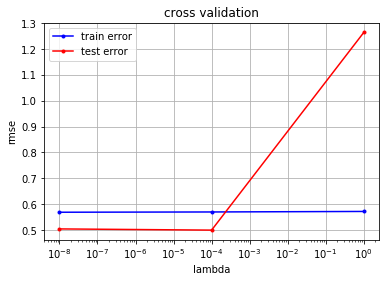

DEGREE = 2
Lambda = 1e-08
K-Fold =  0
Current iteration = 0, loss = [[8.52436917]] Current iteration = 0, loss = [[8.39218361]] Current iteration = 0, loss = [[5.17246949]] Current iteration = 0, loss = [[5.13126567]] Current iteration = 2000, loss = [[0.67730499]] rate = [[0.00045615]]
Current iteration = 2000, loss = [[0.6786502]] rate = [[0.00240969]]
Current iteration = 2000, loss = [[0.68003965]] rate = [[-0.00134521]]
Current iteration = 2000, loss = [[3.49175168]] rate = [[-0.00138945]]
Current iteration = 4000, loss = [[0.68575784]] rate = [[0.00232561]]
Current iteration = 4000, loss = [[0.68562864]] rate = [[-0.00123979]]
Current iteration = 4000, loss = [[0.68460741]] rate = [[0.0001292]]
Current iteration = 4000, loss = [[0.68519206]] rate = [[0.00102124]]


KeyboardInterrupt: 

In [7]:
#lambda_=0.0000001
k_fold=4
seed=5
degree=5 #will -1 as range exclude last elem
lower_lambda=-8
upper_lambda=0

weights_0, loss_0, deg0 = cross_validation_best_weight(y0, tX0_standardized, k_fold, degree, seed, lower_lambda, upper_lambda, "jet0")
weights_1, loss_1, deg1 = cross_validation_best_weight(y1, tX1_standardized, k_fold, degree, seed, lower_lambda, upper_lambda, "jet1")
weights_2, loss_2, deg2 = cross_validation_best_weight(y2, tX2_standardized, k_fold, degree, seed, lower_lambda, upper_lambda, "jet2")
weights_3, loss_3, deg3 = cross_validation_best_weight(y3, tX3_standardized, k_fold, degree, seed, lower_lambda, upper_lambda, "jet3")

# Generate predictions and save ouput in csv format for submission:

In [12]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
print(tX_test.shape, ids_test.shape)

In [13]:
_, tX0_te, id0_te = load_data_jet_number("../data/test.csv", 0)
_, tX1_te, id1_te = load_data_jet_number("../data/test.csv", 1)
_, tX2_te, id2_te = load_data_jet_number("../data/test.csv", 2)
_, tX3_te, id3_te = load_data_jet_number("../data/test.csv", 3)
tX0_te_standardized, tX0_te_mean, tX0_te_std= standardize(tX0_te)
tX1_te_standardized, tX1_te_mean, tX1_te_std= standardize(tX1_te)
tX2_te_standardized, tX2_te_mean, tX2_te_std= standardize(tX2_te)
tX3_te_standardized, tX3_te_mean, tX3_te_std= standardize(tX3_te)

In [22]:
y0_pred = predict_labels(w, a)

[[-2.75157258]
 [-0.47500703]
 [ 0.42537955]
 [-2.62267781]
 [-1.39500056]
 [-2.35267385]
 [-0.88730474]
 [-2.43046776]
 [-2.83740092]
 [-1.8801182 ]
 [-1.59146235]
 [-0.01874744]
 [-2.03022476]
 [-1.95865182]
 [-2.82259573]
 [-1.42175303]
 [-1.69852775]
 [-3.07193772]
 [-0.17078513]
 [-1.51216748]
 [ 0.06946659]
 [ 0.57790712]
 [-3.00188763]
 [-3.1048203 ]
 [ 0.37691754]
 [-0.94225998]
 [-1.08140198]
 [-2.10000513]
 [-1.4457207 ]
 [ 1.37125505]
 [ 0.12446946]
 [-2.46042879]
 [-0.73530546]
 [-2.03875331]
 [-2.72798913]
 [-0.16043609]
 [-5.96100614]
 [-1.19087834]
 [-1.51151616]
 [-1.07751154]
 [ 1.46794467]
 [-2.96578797]
 [-2.98386863]
 [-0.29048986]
 [-0.95067566]
 [-0.82838131]
 [ 0.08114055]
 [-1.48294799]
 [ 0.1902982 ]
 [-1.76157185]
 [-4.03077058]
 [-1.80779363]
 [ 0.2749607 ]
 [-0.77980002]
 [-1.84391736]
 [-1.44034842]
 [-1.50158567]
 [ 0.62098695]
 [-3.2029887 ]
 [-6.17945759]
 [-2.28723705]
 [ 0.6227722 ]
 [-2.8986828 ]
 [-0.22515421]
 [-1.38458   ]
 [-3.22968022]
 [-0.61552

In [21]:
print(y0_pred[0:100])

[[-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]]


In [ ]:
OUTPUT_PATH = '../data/pred.csv' # TODO: fill in desired name of output file for submission
y0_pred = predict_labels(weights_0, build_poly(tX0_te_standardized,deg0))
y1_pred = predict_labels(weights_1, build_poly(tX1_te_standardized,deg1))
y2_pred = predict_labels(weights_2, build_poly(tX2_te_standardized,deg2))
y3_pred = predict_labels(weights_3, build_poly(tX3_te_standardized,deg3))

In [ ]:
y_pred_all=np.concatenate([y0_pred,y1_pred,y2_pred,y3_pred])
ids_pred_all=np.concatenate([id0_te,id1_te,id2_te,id3_te])
y_and_ids=list(zip(*sorted(zip(ids_pred_all, y_pred_all))))
ids_test=y_and_ids[0]
y_pred=y_and_ids[1]

In [ ]:
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)